In [4]:
from misid_model import *
from scipy.optimize import minimize
import numdifftools as nd
from utility_commonPlot import *

# 1. Perform Template Fit

In [14]:
baseDir = common.getBaseDirectory()
tag = 'lltauTight'
X = np.load(baseDir + "data/templates_{}/shaping/X_.npy".format(tag))
XVar = np.load(baseDir + "data/templates_{}/shaping/XVar_.npy".format(tag))
Y = np.load(baseDir + "data/templates_{}/shaping/Y_.npy".format(tag))
model = PredictiveModel(X,splitJetFlavor=True)
model0 = PredictiveModel(X,splitJetFlavor=False)

# X += 0.001
# Y += 0.001

# def paramTransformToModel(param):
#     paramsf = np.ones(12)*param[0]
#     prarmtheta = param[1:]
#     paraminput = np.r_[paramsf,prarmtheta]
#     return paraminput

[ 1.02461463  1.16280182  1.26838454  1.20742446  0.80758862  1.037031
  0.99181397  0.98790037  0.90463895  0.90844715  0.23748505 -0.01485271
 -0.63706011  0.59400794  0.23753341  0.17019738 -0.27833082  0.54417392]
[0.12312984 0.12212397 0.11492185 0.12584292 0.12908981 0.07720618
 0.06631025 0.06322357 0.06242232 0.0664246  0.94958421 0.99894499
 0.70802364 0.75253643 0.99725313 0.99063955 0.72647656 0.73346278]


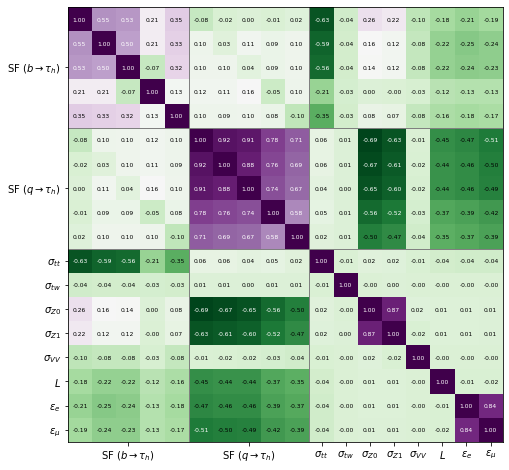

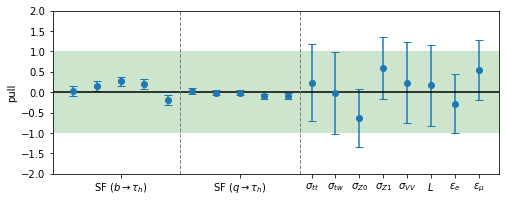

In [15]:
# split Jet Flavor
nsf,ntheta = 10, 6+2
def loss (param):
    #param = paramTransformToModel(param)
    y = model.predict(param)
    loss  = np.sum( (y-Y)**2/(2*(Y+XVar)) )
    #loss  = np.sum( (y-Y)**2/(2*Y) )
    #loss  = np.sum(Y*np.log(y) - y)
    loss += np.sum( (param[nsf:]**2)/2  )
    return loss

paramInit = np.array([1.]*nsf + [0]*ntheta)
result = minimize( loss, paramInit, method='SLSQP', bounds = [(0,2)]*nsf + [(-5,5)]*ntheta )

hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
hessinv = np.linalg.inv(hess)
sig   = np.sqrt(hessinv.diagonal())
cor   = hessinv/np.outer(sig, sig)
loss0 = loss(result.x)

print(result.x)
print(sig)


ticksPos = [2,7,10,11,12,13,14,15,16,17]
ticksName = [r'SF $ (b \rightarrow \tau_h)$',
             r'SF $ (q \rightarrow \tau_h)$',
             r'$\sigma_{tt}$',
             r'$\sigma_{tw}$',
             r'$\sigma_{Z0}$',
             r'$\sigma_{Z1}$',
             r'$\sigma_{VV}$',
             r'$L$',r'$\epsilon_e$',r'$\epsilon_\mu$',
            ]

plt.figure(figsize=(8,8),facecolor='w')
plt.imshow(cor,cmap='PRGn_r')
plt.axhline(4.5,color='gray',linewidth=1)
plt.axhline(9.5,color='gray',linewidth=1)
plt.axvline(4.5,color='gray',linewidth=1)
plt.axvline(9.5,color='gray',linewidth=1)



plt.xticks(ticksPos,ticksName)
plt.yticks(ticksPos,ticksName)
#plt.colorbar(shrink=0.8)

for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        value = cor[i,j]
#         if abs(value)<0.2:
#             continue
        if abs(value)>0.5:
            fcolor = 'w'
        else:
            fcolor = 'k'
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(cor[i,j]),fontsize=6,color=fcolor )

plt.savefig('../../../plots/misid/corr2_{}_splitJetFlavor.png'.format(tag),dpi=300)

y = result.x.copy()
yerr = sig.copy()
y[:nsf] -=1
plt.figure(figsize=(8,3),facecolor='w')
plt.errorbar(np.arange(len(y)), y, yerr = yerr, fmt='o',capsize=4)
plt.axhline(0,color="k")
plt.axhspan(-1, 1, facecolor='g', alpha=0.2)
plt.axvline(4.5,color='gray',linestyle="--",linewidth=1)
plt.axvline(9.5,color='gray',linestyle="--",linewidth=1)
plt.ylim(-2,2)
plt.xticks(ticksPos,ticksName)
plt.ylabel("pull")
plt.savefig('../../../plots/misid/pull2_{}_splitJetFlavor.png'.format(tag),dpi=300)

[ 0.99661162  0.9684893   0.97328493  0.91005898  0.85434584  1.30306769
  0.043349   -0.91486827  0.36845768  1.31408421  0.82156513  0.17042947
  1.14448741]
[0.06026741 0.05166636 0.04908312 0.04453081 0.04231691 0.72052962
 0.996484   0.51385292 0.56632134 0.98765545 0.98945007 0.70278847
 0.71235187]


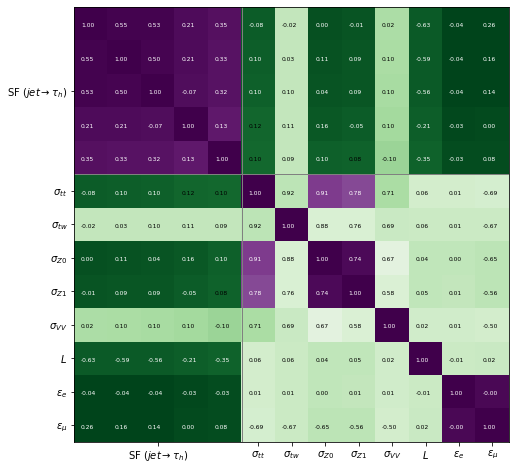

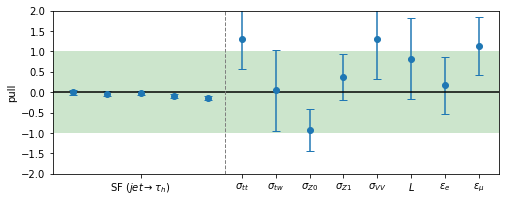

In [16]:
# combine Jet Flavor
nsf,ntheta = 5, 6+2
def loss0 (param):
    #param = paramTransformToModel(param)
    y = model0.predict(param)
    loss  = np.sum( (y-Y)**2/(2*Y) )
    #loss  = np.sum(Y*np.log(y) - y
    loss += np.sum( (param[nsf:]**2)/2  )
    return loss

paramInit = np.array([1.]*nsf + [0]*ntheta)
result0 = minimize( loss0, paramInit, method='SLSQP', bounds = [(0,2)]*nsf + [(-5,5)]*ntheta )

hcalc0 = nd.Hessian(loss0, step=1e-4, method='central')
hess0  = hcalc0( result0.x )
hessinv0 = np.linalg.inv(hess0)
sig0   = np.sqrt(hessinv0.diagonal())
cor0   = hessinv0/np.outer(sig0, sig0)
loss = loss0(result0.x)

print(result0.x)
print(sig0)

ticksPos = [2,5,6,7,8,9,10,11,12]
ticksName = [r'SF $ (jet \rightarrow \tau_h)$',
             r'$\sigma_{tt}$',
             r'$\sigma_{tw}$',
             r'$\sigma_{Z0}$',
             r'$\sigma_{Z1}$',
             r'$\sigma_{VV}$',
             r'$L$',r'$\epsilon_e$',r'$\epsilon_\mu$',
            ]

plt.figure(figsize=(8,8),facecolor='w')
plt.imshow(cor0,cmap='PRGn_r')
plt.axhline(4.5,color='gray',linewidth=1)
#plt.axhline(11.5,color='gray',linewidth=1)
plt.axvline(4.5,color='gray',linewidth=1)
#plt.axvline(11.5,color='gray',linewidth=1)


plt.xticks(ticksPos,ticksName)
plt.yticks(ticksPos,ticksName)
#plt.colorbar(shrink=0.8)

for i in range(cor0.shape[0]):
    for j in range(cor0.shape[1]):
        value = cor0[i,j]
#         if abs(value)<0.2:
#             continue
        if abs(value)>0.5:
            fcolor = 'w'
        else:
            fcolor = 'k'
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(cor[i,j]),fontsize=6,color=fcolor )

plt.savefig('../../../plots/misid/corr2_{}_combineJetFlavor.png'.format(tag),dpi=300)

y = result0.x.copy()
yerr = sig0.copy()
y[:nsf] -=1
plt.figure(figsize=(8,3),facecolor='w')
plt.errorbar(np.arange(len(y)), y, yerr = yerr, fmt='o',capsize=4)
plt.axhline(0,color="k")
plt.axhspan(-1, 1, facecolor='g', alpha=0.2)
plt.axvline(4.5,color='gray',linestyle="--",linewidth=1)
plt.ylim(-2,2)
plt.xticks(ticksPos,ticksName)
plt.ylabel("pull")
plt.savefig('../../../plots/misid/pull2_{}_combineJetFlavor.png'.format(tag),dpi=300)

# 2. Plot Post-fit Templates

In [17]:
param_opt = result.x
#param_opt = paramTransformToModel(result.x)

temp = np.concatenate(model.predict(param_opt,True),axis=1)
targ = np.concatenate(Y,axis=0)
# separate processes
mctt = np.sum(temp[0:5],axis=0)
mct  = np.sum(temp[5:10],axis=0)
mcz  = np.sum(temp[10:15],axis=0)
mcvv = np.sum(temp[15:20],axis=0)

mclist = [mcvv,mcz,mct,mctt]

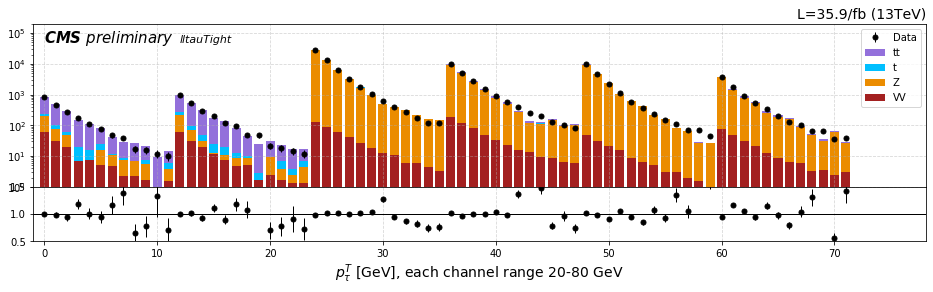

In [18]:
colorList = ["#a32020","#eb8c00","deepskyblue","mediumpurple"]
labelList = ["VV","Z","t","tt"]
chList = common.channelLsit()


fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[3,1]},
                         figsize=(16,4))
fig.subplots_adjust(hspace=0)


c = np.arange(targ.size)
accum = np.zeros(targ.size)

# making plot

ax = axes[0]
for i in range(len(mclist)):
    height = mclist[i]
    ax.bar(c, height, bottom=accum, width=0.8, alpha=1, color=colorList[i],label=labelList[i])
    accum += height
ax.errorbar(c, targ,yerr=targ**0.5, c='k', fmt='.',markersize=10,lw=1, label='Data')
ax.grid(True,linestyle="--",alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
ax.set_yscale('log')
ax.set_ylim(1,2e5)
ax.text(0, 5e4, r'CMS $preliminary$',style="italic",fontsize="15",fontweight='bold')
ax.text(12, 5e4, tag, style="italic", fontsize=11)
ax.set_title("L=35.9/fb (13TeV)",loc="right",fontsize=14)

ax = axes[1]
ax.errorbar(c, targ/accum, yerr=targ**0.5/accum, c='k', fmt='.',markersize=10,lw=1)
ax.grid(True,linestyle="--",alpha=0.5)
ax.axhline(1,lw=1,color='k')
ax.set_ylim(0.5,1.5)
ax.set_xlim(c.min()-1., 1.1*c.max())
ax.set_xlabel(r'$p^T_\tau$ [GeV], each channel range 20-80 GeV',fontsize=14)

plt.savefig('../../../plots/misid/2020_tauID_postfit_{}.png'.format(tag),dpi=300)

# Show the fitting Results

In [19]:
ptpos = np.array([22.5,27.5,35,45,65])
ptwid = np.array([2.5,2.5,5,5,15])

c_sf = result.x[:10].reshape(2,5)
s_sf = sig[:10].reshape(2,5)



c_sfjet = result0.x[:5]
s_sfjet = sig0[:5]
# c_sfjet = array([1.01831573, 0.96135078, 0.9429135 , 0.88707892, 0.93013478, 0.70739701])
# s_sfjet = array([0.05479143, 0.04606   , 0.04338468, 0.04102377, 0.04481317,0.04184311])

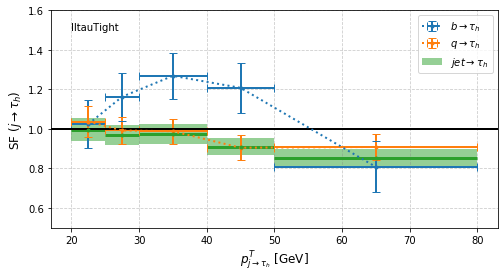

In [20]:
plt.figure(figsize=(8,4),facecolor='w')

plt.errorbar(ptpos,c_sf[0],xerr=ptwid,yerr=s_sf[0],
             fmt='.:', lw=2, color='C0',alpha=1,capsize=4,
             label=r'$b \rightarrow \tau_h$')


plt.errorbar(ptpos,c_sf[1],xerr=ptwid,yerr=s_sf[1],
             fmt='.:', lw=2, color='C1',alpha=1,capsize=4,
             label=r'$q \rightarrow \tau_h$')

# plt.bar(ptpos,2*s_sf[0],bottom=c_sf[0]-s_sf[0],width=2*ptwid, color='C0',alpha=0.3)
# plt.bar(ptpos,2*s_sf[1],bottom=c_sf[1]-s_sf[1],width=2*ptwid, color='C1',alpha=0.3)


plt.bar(ptpos,2*s_sfjet,bottom=c_sfjet-s_sfjet,width=2*ptwid,
        color='C2',alpha=0.5,
        label=r'$jet \rightarrow \tau_h$')

plt.errorbar(ptpos,c_sfjet,xerr=ptwid,
             fmt='.', lw=3, color='C2',alpha=1)



plt.axhline(1,color='k',linewidth=2)

plt.grid(linestyle='--',color='grey',alpha=0.4)
plt.legend()
plt.xlabel(r'$p^T_{j\rightarrow \tau_h}$ [GeV]',fontsize=12)
plt.ylabel(r'SF $ (j\rightarrow \tau_h)$',fontsize=12)
plt.ylim([0.5,1.6])
plt.text(20,1.5,tag)
plt.savefig('../../../plots/misid/fit_ptflavor2_{}.png'.format(tag),dpi=300)

In [21]:
d = {'bin_pT1': ptpos - ptwid, 
     'bin_pT2': ptpos + ptwid,
     'SF_b2MisID':c_sf[0],
     'SF_q2MisID':c_sf[1],
     'SF_j2MisID':c_sfjet,
     'sigma_SF_b2MisID':s_sf[0],
     'sigma_SF_q2MisID':s_sf[1],
     'sigma_SF_j2MisID':s_sfjet
    }
df = pd.DataFrame(data=d)
df.to_csv('../../../data/templates_{}/SF_misID.csv'.format(tag))

In [22]:
print('b -> tau')
for i in range(5):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sf[0,i],s_sf[0,i]), end='')

print(' ')
print('q -> tau')
for i in range(5):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sf[1,i],s_sf[1,i]), end='')

print(' ')
print('jet -> tau')
for i in range(5):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sfjet[i],s_sfjet[i]), end='')

b -> tau
 & $1.02\pm0.12$ & $1.16\pm0.12$ & $1.27\pm0.11$ & $1.21\pm0.13$ & $0.81\pm0.13$ 
q -> tau
 & $1.04\pm0.08$ & $0.99\pm0.07$ & $0.99\pm0.06$ & $0.90\pm0.06$ & $0.91\pm0.07$ 
jet -> tau
 & $1.00\pm0.06$ & $0.97\pm0.05$ & $0.97\pm0.05$ & $0.91\pm0.04$ & $0.85\pm0.04$

In [15]:
c_sf.T

array([[0.96540497, 1.01758775],
       [1.19297859, 0.95282035],
       [1.39458004, 0.9361863 ],
       [0.95523613, 0.89075941],
       [0.90519364, 0.86459158]])

In [9]:
c_sf.T

array([[0.96491469, 1.03218616],
       [1.18915932, 0.96135999],
       [1.39477257, 0.94313369],
       [0.95565674, 0.89532171],
       [0.90569539, 0.86912205]])

In [46]:
a = array([23105.0,23040.0,46342.0,694.0,717.0,1420.0,5260.0,5158.0,9727.0,8199.0,8029.0,30054.0,8163.0,8006.0,29970.0,290101.0,289467.0,50864.0,50050.0,187515.0,904067.0])
#a = array([1811409.0,1811532.0,3620281.0,57056.0,54227.0,111124.0,418128.0,407605.0,763147.0,642646.0,626108.0,2350887.0,643368.0,627277.0,2353727.0,22670017.0,22653517.0,4016590.0,3923503.0,14718934.0,70930278.0])

In [47]:
hh = a[20]
lh = a[15:20]
ll = a[0:15]

In [51]:
( (sum(ll)+sum(ll)**0.5 )/sum(a))**0.5/3 - (sum(ll)/sum(a))**0.5/3

0.00011838152307137861

In [50]:
(sum(ll)/sum(a))**0.5/3

0.10800960689158423

In [48]:
print('b -> tau')
for i in range(6):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sf[0,i],s_sf[0,i]), end='')

print(' ')
print('q -> tau')
for i in range(6):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sf[1,i],s_sf[1,i]), end='')

print(' ')
print('jet -> tau')
for i in range(6):
    print(' & ${:4.2f}\pm{:4.2f}$'.format(c_sfjet[i],s_sfjet[i]), end='')

b -> tau
 & $0.94\pm0.14$ & $1.17\pm0.15$ & $1.38\pm0.14$ & $0.95\pm0.14$ & $0.95\pm0.21$ & $0.79\pm0.27$ 
q -> tau
 & $1.08\pm0.08$ & $1.00\pm0.07$ & $0.98\pm0.06$ & $0.93\pm0.07$ & $0.99\pm0.09$ & $0.72\pm0.10$ 
jet -> tau
 & $1.09\pm0.06$ & $1.02\pm0.05$ & $1.02\pm0.05$ & $0.95\pm0.04$ & $0.97\pm0.05$ & $0.70\pm0.04$